<a href="https://colab.research.google.com/drive/1n4O-rRmKNn7jDJO30kRRyVPDn6-HICkb?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<i>Mutual Funds Prediction</i><br>
--
Coded by : sammyon7<br>
Dataset <a href="https://drive.google.com/drive/folders/1jjufCJRUcaPOkbjvG7Xl0kfkvuCsAV85?usp=sharing">link</a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [4]:
fund_specs=pd.read_csv('Datasets/fund_specs.csv',thousands=',')
fund_specs.head(10)

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25
5,NaN,USD,3.322000e+07,0.73,3.0,2001-11-25,249560,NaN,10.69
6,Blend,USD,1.070000e+09,1.95,3.0,1996-12-15,202778,Large,2.43
7,Value,USD,6.243000e+07,1.42,NaN,2015-07-13,138257,Large,12.48
8,Value,USD,NaN,6.15,3.0,2006-06-11,102419,Large,-1.06
9,Growth,USD,6.987700e+08,1.80,5.0,2003-03-02,62027,Large,5.99


In [5]:
fund_specs.nunique()

investment_class         3
currency                 1
total_assets          6013
yield                  890
greatstone_rating        6
inception_date        4383
tag                  25000
fund_size                3
return_ytd            2751
dtype: int64

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
fund_specs.drop(labels=['currency'],axis=1,inplace=True)
fund_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   investment_class   23520 non-null  object 
 1   total_assets       24881 non-null  float64
 2   yield              24873 non-null  float64
 3   greatstone_rating  20000 non-null  float64
 4   inception_date     25000 non-null  object 
 5   tag                25000 non-null  int64  
 6   fund_size          23520 non-null  object 
 7   return_ytd         24892 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


In [9]:
date_array=fund_specs['inception_date'].str.split('-')
print(date_array)

0        [2015, 02, 02]
1        [2012, 05, 30]
2        [1987, 08, 23]
3        [2005, 10, 24]
4        [2016, 12, 12]
              ...      
24995    [1986, 12, 29]
24996    [2003, 09, 01]
24997    [2014, 11, 30]
24998    [2000, 06, 25]
24999    [2001, 06, 17]
Name: inception_date, Length: 25000, dtype: object


In [10]:
for i in range(0,fund_specs.inception_date.size):
    fund_specs['inception_date'][i]=date_array[i][0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
fund_specs.inception_date=fund_specs.inception_date.astype('int32')

In [14]:
fund_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   investment_class   23520 non-null  object 
 1   total_assets       24881 non-null  float64
 2   yield              24873 non-null  float64
 3   greatstone_rating  20000 non-null  float64
 4   inception_date     25000 non-null  int32  
 5   tag                25000 non-null  int64  
 6   fund_size          23520 non-null  object 
 7   return_ytd         24892 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 1.4+ MB


In [18]:
fund_specs[['investment_class','fund_size']]=fund_specs[['investment_class','fund_size']].fillna(method='bfill')
fund_specs.investment_class.replace({'Growth':0,'Blend':1,'Value':2},inplace=True)
fund_specs.fund_size.replace({'Small':0,'Medium':1,'Large':2},inplace=True)

fund_specs.head(10)

,investment_class,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,2,1.185000e+07,5.57,NaN,2015,67922,2,20.19
1,0,1.397000e+10,0.42,3.0,2012,134783,2,16.79
2,0,2.660000e+09,0.02,4.0,1987,61271,2,17.13
3,2,1.957000e+10,2.71,3.0,2005,64412,2,11.63
4,1,2.847000e+07,2.44,0.0,2016,184058,2,10.25
5,1,3.322000e+07,0.73,3.0,2001,249560,2,10.69
6,1,1.070000e+09,1.95,3.0,1996,202778,2,2.43
7,2,6.243000e+07,1.42,NaN,2015,138257,2,12.48
8,2,NaN,6.15,3.0,2006,102419,2,-1.06
9,0,6.987700e+08,1.80,5.0,2003,62027,2,5.99


In [20]:
fund_specs.nunique()

investment_class         3
total_assets          6013
yield                  890
greatstone_rating        6
inception_date          88
tag                  25000
fund_size                3
return_ytd            2751
dtype: int64

In [24]:
fund_specs.total_assets.fillna(fund_specs.total_assets.median(),inplace=True)
fund_specs.corrwith(fund_specs.greatstone_rating)

investment_class    -0.063343
total_assets         0.110571
yield                0.082698
greatstone_rating    1.000000
inception_date      -0.143729
tag                  0.001028
fund_size           -0.036445
return_ytd           0.112224
dtype: float64

In [28]:
fund_specs.return_ytd.fillna(fund_specs.return_ytd.median(),inplace=True)
fund_specs['yield'].fillna(fund_specs['yield'].median(),inplace=True)

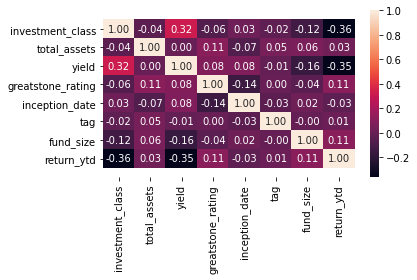

In [29]:
corr=fund_specs.corr()
fund_specs_corr=sns.heatmap(corr,annot=True, fmt='.2f')
b,t=fund_specs_corr.get_ylim()
fund_specs_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

In [30]:
corr

,investment_class,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
investment_class,1.000000,-0.035657,0.321028,-0.063343,0.027255,-0.021820,-0.122219,-0.360621
total_assets,-0.035657,1.000000,0.002673,0.110571,-0.071569,0.052561,0.060264,0.029080
yield,0.321028,0.002673,1.000000,0.082694,0.078502,-0.005527,-0.157405,-0.350646
greatstone_rating,-0.063343,0.110571,0.082694,1.000000,-0.143729,0.001028,-0.036445,0.111645
inception_date,0.027255,-0.071569,0.078502,-0.143729,1.000000,-0.033956,0.016811,-0.028800
tag,-0.021820,0.052561,-0.005527,0.001028,-0.033956,1.000000,-0.002148,0.012575
fund_size,-0.122219,0.060264,-0.157405,-0.036445,0.016811,-0.002148,1.000000,0.112264
return_ytd,-0.360621,0.029080,-0.350646,0.111645,-0.028800,0.012575,0.112264,1.000000


In [31]:
fund_ratios=pd.read_csv('Datasets/fund_ratios.csv',thousands=',')

In [32]:
fund_ratios.head(10)

,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,19857.41,5.91,14.51
1,f5ad58c2-fdea-4087-8678-e04744f89f90,134783,0.58,5.30,3.38,72347.03,15.95,18.88
2,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,61271,0.99,5.40,3.67,68857.43,15.97,23.27
3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,64412,0.52,2.23,1.63,43266.62,8.93,12.70
4,63d8406d-c525-494a-8e03-d4fc4cfcb571,184058,0.75,2.02,1.40,43747.90,7.59,14.74
5,090afb4d-eca3-4f69-8275-a140a0b40292,249560,1.90,0.00,0.00,0.00,0.00,0.00
6,17421c06-1ed9-4a00-b88b-91dcf9e0dc77,202778,1.73,2.48,1.94,55075.22,8.67,15.26
7,08702e4f-c5bb-4f0a-b63b-f9e4a0eb2425,138257,1.04,2.18,1.17,38651.17,5.87,13.16
8,40989717-745e-422c-a761-9695cb9989a8,102419,1.07,1.13,0.73,22061.79,3.61,12.09
9,bcd0ba02-c92f-4d50-803c-1b9a9311ccfb,62027,0.85,2.92,1.90,40780.45,9.41,16.92


In [33]:
fund_ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
tag,25000.0,139878.934640,65731.287074,26000.0,83021.75,139881.50,196759.250,253763.00
fund_ratio_net_annual_expense,25000.0,1.121677,0.609215,0.0,0.72,1.01,1.440,15.17
pb_ratio,24886.0,1.854262,2.984248,0.0,0.56,1.85,2.380,123.30
ps_ratio,24886.0,1.739073,30.589236,0.0,0.32,1.29,1.800,2777.78
mmc,24886.0,28195.536154,33609.823308,0.0,510.96,16974.33,42810.135,363960.31
pc_ratio,24886.0,17.390380,457.933286,0.0,0.62,6.97,8.950,20000.00
pe_ratio,24886.0,13.460729,45.312060,0.0,4.44,13.98,16.480,1694.92


In [36]:
fund_ratios['pb_ratio'].fillna(fund_ratios['pb_ratio'].mean(),inplace=True)
fund_ratios['ps_ratio'].fillna(fund_ratios['ps_ratio'].mean(),inplace=True)
fund_ratios['mmc'].fillna(fund_ratios['mmc'].median(),inplace=True)
fund_ratios['pc_ratio'].fillna(fund_ratios['pc_ratio'].mean(),inplace=True)
fund_ratios['pe_ratio'].fillna(fund_ratios['pe_ratio'].mean(),inplace=True)

In [37]:
fund_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fund_id                        25000 non-null  object 
 1   tag                            25000 non-null  int64  
 2   fund_ratio_net_annual_expense  25000 non-null  float64
 3   pb_ratio                       25000 non-null  float64
 4   ps_ratio                       25000 non-null  float64
 5   mmc                            25000 non-null  float64
 6   pc_ratio                       25000 non-null  float64
 7   pe_ratio                       25000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB


In [38]:
bond_ratings=pd.read_csv('Datasets/bond_ratings.csv')

In [39]:
bond_ratings.head(10)

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.00,0.0,0.00,0.00,NaN,0.00,67922,0.00,0.00,0.00,0.00,NaN
1,0.00,0.0,0.00,0.00,NaN,0.00,134783,0.00,0.00,0.00,0.00,NaN
2,0.00,0.0,0.00,0.00,NaN,0.00,61271,0.00,0.00,0.00,0.00,NaN
3,0.00,0.0,0.00,0.00,NaN,0.00,64412,0.00,0.00,0.00,0.00,NaN
4,0.00,0.0,0.00,0.00,NaN,0.00,184058,0.00,0.00,0.00,0.00,NaN
5,0.00,0.0,0.00,0.00,NaN,0.00,249560,0.00,0.00,0.00,0.00,NaN
6,17.94,0.0,0.78,10.04,NaN,21.07,202778,8.53,7.44,1.64,32.55,NaN
7,0.00,0.0,0.00,0.00,NaN,0.00,138257,0.00,0.00,0.00,0.00,NaN
8,0.00,0.0,0.00,0.00,NaN,0.00,102419,0.00,0.00,0.00,0.00,NaN
9,1.78,0.0,0.17,5.86,7.34,1.35,62027,8.40,63.07,3.90,15.47,4.84


In [43]:
bond_ratings.maturity_bond.fillna(bond_ratings.maturity_bond.mean(),inplace=True)
bond_ratings.duration_bond.fillna(bond_ratings.duration_bond.mean(),inplace=True)
bond_ratings.drop(labels='us_govt_bond_rating',axis=1,inplace=True)
bond_ratings.fillna(0,inplace=True)

In [44]:
bond_ratings

,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.00,0.00,0.0,7.765444,0.00,67922,0.00,0.0,0.00,0.00,4.643082
1,0.00,0.00,0.0,7.765444,0.00,134783,0.00,0.0,0.00,0.00,4.643082
2,0.00,0.00,0.0,7.765444,0.00,61271,0.00,0.0,0.00,0.00,4.643082
3,0.00,0.00,0.0,7.765444,0.00,64412,0.00,0.0,0.00,0.00,4.643082
4,0.00,0.00,0.0,7.765444,0.00,184058,0.00,0.0,0.00,0.00,4.643082
...,...,...,...,...,...,...,...,...,...,...,...
24995,0.00,0.00,0.0,7.765444,0.00,142001,0.00,0.0,0.00,0.00,4.643082
24996,0.00,0.00,0.0,7.765444,0.00,40598,0.00,0.0,0.00,0.00,4.643082
24997,24.65,2.81,4.0,6.850000,40.22,202562,3.42,11.7,0.42,12.78,2.740000
24998,0.00,0.00,0.0,7.765444,0.00,144818,0.00,0.0,0.00,0.00,4.643082


In [45]:
print(bond_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bb_rating       25000 non-null  float64
 1   below_b_rating  25000 non-null  float64
 2   others_rating   25000 non-null  float64
 3   maturity_bond   25000 non-null  float64
 4   b_rating        25000 non-null  float64
 5   tag             25000 non-null  int64  
 6   a_rating        25000 non-null  float64
 7   aaa_rating      25000 non-null  float64
 8   aa_rating       25000 non-null  float64
 9   bbb_rating      25000 non-null  float64
 10  duration_bond   25000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.1 MB
None


In [46]:
fund_allocations=pd.read_csv('Datasets/fund_allocations.csv')
fund_allocations.head(10)

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38
2,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09
3,6.53,13.80,10.91,0.16,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43
4,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95
5,0.00,14.20,16.76,9.82,15.64,0.00,0.00,0.00,0.00,249560,43.58,0.00
6,4.35,14.12,14.69,16.73,2.35,7.76,7.22,15.77,3.48,202778,4.31,9.22
7,4.25,23.02,8.24,11.89,2.86,8.47,7.33,13.92,4.18,138257,6.34,9.50
8,8.45,18.86,11.39,3.04,6.25,8.43,9.39,7.67,6.53,102419,3.48,16.50
9,3.02,14.90,12.48,22.17,3.35,4.27,6.61,14.32,2.88,62027,2.37,13.64


In [50]:
fund_allocations['portfolio_tech_allocation'].fillna(fund_allocations['portfolio_tech_allocation'].median(),inplace=True)

In [51]:
fund_allocations['portfolio_utils_allocation'].fillna(fund_allocations['portfolio_utils_allocation'].median(),inplace=True)

In [53]:
fund_allocations.fillna(fund_allocations.mean(),inplace=True)
fund_allocations.rename(columns={'id':'tag'}, inplace=True)

In [55]:
other_specs=pd.read_csv('Datasets/other_specs.csv',thousands=',')

In [58]:
other_specs.drop(labels=['pc_ratio','pb_ratio','pe_ratio','mmc','ps_ratio'],axis=1,inplace=True)

other_specs[['cash_percent_of_portfolio',
             'stock_percent_of_portfolio',
             'portfolio_others',
             'bond_percentage_of_porfolio',
             'portfolio_preferred',
             'portfolio_convertable']]=other_specs[['cash_percent_of_portfolio',
             'stock_percent_of_portfolio',
             'portfolio_others',
             'bond_percentage_of_porfolio',
             'portfolio_preferred',
             'portfolio_convertable']].fillna(16.67)

In [59]:
other_specs.head(10)

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,NaN,NaN,1.0,-16.32,67922,13.05,1.19,NaN,20.19,2.0,NaN,4.20,NaN,20.19,19.10,-5.78,18.40,NaN,0.00,19.10,0.00,16.14,98.81,27.30,NaN,NaN,4.24,NaN,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.00,0.00,NaN,NaN
1,10.00,15.34,5.0,-2.09,134783,10.71,0.10,NaN,16.79,1.0,14.25,2.12,35.46,16.79,15.67,27.67,12.18,5.60,0.00,15.67,0.00,1.64,99.90,3.23,NaN,NaN,14.39,NaN,-2.62,26.39,3.0,1.06,3.60,2.33,0.00,0.00,NaN,33.92
2,10.00,15.34,26.0,-2.09,61271,10.71,2.00,-2.46,17.13,5.0,11.04,2.12,30.42,17.13,15.67,27.67,19.77,3.68,0.00,15.67,0.22,2.32,97.12,3.23,-2.23,17.23,16.42,15.52,5.04,25.79,4.0,1.06,3.60,3.77,0.58,0.08,15.53,33.92
3,10.21,14.57,11.0,-8.53,64412,4.48,6.13,-0.75,11.63,2.0,12.32,0.46,29.31,11.63,11.29,15.94,7.11,2.09,0.00,11.29,0.00,14.66,93.87,14.81,0.08,15.63,6.85,17.66,-7.54,8.53,3.0,1.00,-4.05,1.46,0.00,0.00,13.66,31.21
4,NaN,NaN,1.0,-7.04,184058,3.17,6.59,NaN,10.25,1.0,NaN,1.28,NaN,10.25,10.36,18.43,3.11,NaN,0.09,10.36,0.80,NaN,67.41,NaN,NaN,NaN,0.00,NaN,-7.37,17.52,0.0,0.45,NaN,1.28,24.97,0.02,NaN,NaN
5,6.37,10.92,13.0,-2.11,249560,5.81,1.40,-5.62,10.69,4.0,5.71,0.06,26.37,10.69,10.22,12.18,6.20,-7.08,77.39,10.22,0.00,5.41,6.24,7.68,1.76,12.25,10.69,8.51,-1.59,16.72,3.0,1.22,-3.67,0.51,0.00,14.97,16.77,21.66
6,1.81,3.87,17.0,-4.03,202778,0.73,28.24,-2.79,2.43,5.0,4.77,0.72,9.22,2.43,4.17,5.14,0.54,2.20,0.00,4.17,2.99,1.51,41.76,1.38,-6.03,8.23,1.45,4.17,-1.84,1.52,3.0,1.57,-2.58,-0.07,24.23,1.71,5.51,4.16
7,NaN,NaN,2.0,-8.53,138257,4.48,3.32,NaN,12.48,1.0,NaN,0.46,NaN,12.48,11.29,15.94,3.53,NaN,0.00,11.29,0.00,14.28,96.68,14.81,NaN,NaN,11.03,NaN,-8.81,15.75,NaN,1.00,-4.05,-0.27,0.00,0.00,NaN,NaN
8,NaN,NaN,5.0,NaN,102419,-6.27,1.30,NaN,-1.06,4.0,NaN,-0.40,NaN,-1.20,8.71,NaN,-4.19,NaN,0.00,8.71,1.33,NaN,96.65,NaN,NaN,NaN,-3.34,NaN,NaN,NaN,3.0,1.11,NaN,-2.81,0.72,0.00,NaN,NaN
9,3.54,8.35,13.0,-3.14,62027,2.87,3.32,2.01,5.99,2.0,5.30,1.20,9.07,5.99,5.08,6.25,6.07,0.07,0.09,5.08,0.00,4.47,13.59,5.55,4.62,17.28,4.56,13.34,-0.13,5.19,5.0,0.69,-2.07,1.45,82.53,0.00,9.73,4.02


In [60]:
nul_cat_tag_list=fund_specs[['tag','inception_date']]

In [61]:
# Define the empty lists
dateEqual2018=[]
dateEqual2017=[]
dateEqual2016=[]
dateEqual2015=[]
dateEqual2014=[]
dateEqual2013=[]
dateEqual2012=[]
dateEqual2011=[]
dateEqual2010=[]

In [62]:
for tagVal,date in nul_cat_tag_list.itertuples(index=False):
    if date==2018:
        dateEqual2018.append(tagVal)
    elif date==2017:
        dateEqual2017.append(tagVal)
    elif date==2016:
        dateEqual2016.append(tagVal)
    elif date==2015:
        dateEqual2015.append(tagVal)
    elif date==2014:
        dateEqual2014.append(tagVal)
    elif date==2013:
        dateEqual2013.append(tagVal)
    elif date==2012:
        dateEqual2012.append(tagVal)
    elif date==2011:
        dateEqual2011.append(tagVal)
    elif date>2011:
        dateEqual2010.append(tagVal)

In [64]:
other_specs.head(10)

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,NaN,NaN,1.0,-16.32,67922,13.05,1.19,NaN,20.19,2.0,NaN,4.20,NaN,20.19,19.10,-5.78,18.40,NaN,0.00,19.10,0.00,16.14,98.81,27.30,NaN,NaN,4.24,NaN,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.00,0.00,NaN,NaN
1,10.00,15.34,5.0,-2.09,134783,10.71,0.10,NaN,16.79,1.0,14.25,2.12,35.46,16.79,15.67,27.67,12.18,5.60,0.00,15.67,0.00,1.64,99.90,3.23,NaN,NaN,14.39,NaN,-2.62,26.39,3.0,1.06,3.60,2.33,0.00,0.00,NaN,33.92
2,10.00,15.34,26.0,-2.09,61271,10.71,2.00,-2.46,17.13,5.0,11.04,2.12,30.42,17.13,15.67,27.67,19.77,3.68,0.00,15.67,0.22,2.32,97.12,3.23,-2.23,17.23,16.42,15.52,5.04,25.79,4.0,1.06,3.60,3.77,0.58,0.08,15.53,33.92
3,10.21,14.57,11.0,-8.53,64412,4.48,6.13,-0.75,11.63,2.0,12.32,0.46,29.31,11.63,11.29,15.94,7.11,2.09,0.00,11.29,0.00,14.66,93.87,14.81,0.08,15.63,6.85,17.66,-7.54,8.53,3.0,1.00,-4.05,1.46,0.00,0.00,13.66,31.21
4,NaN,NaN,1.0,-7.04,184058,3.17,6.59,NaN,10.25,1.0,NaN,1.28,NaN,10.25,10.36,18.43,3.11,NaN,0.09,10.36,0.80,NaN,67.41,NaN,NaN,NaN,0.00,NaN,-7.37,17.52,0.0,0.45,NaN,1.28,24.97,0.02,NaN,NaN
5,6.37,10.92,13.0,-2.11,249560,5.81,1.40,-5.62,10.69,4.0,5.71,0.06,26.37,10.69,10.22,12.18,6.20,-7.08,77.39,10.22,0.00,5.41,6.24,7.68,1.76,12.25,10.69,8.51,-1.59,16.72,3.0,1.22,-3.67,0.51,0.00,14.97,16.77,21.66
6,1.81,3.87,17.0,-4.03,202778,0.73,28.24,-2.79,2.43,5.0,4.77,0.72,9.22,2.43,4.17,5.14,0.54,2.20,0.00,4.17,2.99,1.51,41.76,1.38,-6.03,8.23,1.45,4.17,-1.84,1.52,3.0,1.57,-2.58,-0.07,24.23,1.71,5.51,4.16
7,NaN,NaN,2.0,-8.53,138257,4.48,3.32,NaN,12.48,1.0,NaN,0.46,NaN,12.48,11.29,15.94,3.53,NaN,0.00,11.29,0.00,14.28,96.68,14.81,NaN,NaN,11.03,NaN,-8.81,15.75,NaN,1.00,-4.05,-0.27,0.00,0.00,NaN,NaN
8,NaN,NaN,5.0,NaN,102419,-6.27,1.30,NaN,-1.06,4.0,NaN,-0.40,NaN,-1.20,8.71,NaN,-4.19,NaN,0.00,8.71,1.33,NaN,96.65,NaN,NaN,NaN,-3.34,NaN,NaN,NaN,3.0,1.11,NaN,-2.81,0.72,0.00,NaN,NaN
9,3.54,8.35,13.0,-3.14,62027,2.87,3.32,2.01,5.99,2.0,5.30,1.20,9.07,5.99,5.08,6.25,6.07,0.07,0.09,5.08,0.00,4.47,13.59,5.55,4.62,17.28,4.56,13.34,-0.13,5.19,5.0,0.69,-2.07,1.45,82.53,0.00,9.73,4.02


In [71]:
for tagVal in dateEqual2011:
    if other_specs[other_specs.tag==tagVal]['2010_return_category'].isna().values[0]:
        other_specs['2010_return_fund']=other_specs['2010_return_fund'].fillna(0)
        other_specs['2010_return_category']=other_specs['2010_return_category'].fillna(0)

for tagVal in dateEqual2012:
    if other_specs[other_specs.tag==tagVal]['2011_return_category'].isna().values[0]:
        other_specs['2011_return_fund']=other_specs['2011_return_fund'].fillna(0)
        other_specs['2011_return_category']=other_specs['2011_return_category'].fillna(0)

for tagVal in dateEqual2013:
    if other_specs[other_specs.tag==tagVal]['2012_return_category'].isna().values[0]:
        other_specs['2012_fund_return']=other_specs['2012_fund_return'].fillna(0)
        other_specs['2012_return_category']=other_specs['2012_return_category'].fillna(0)

for tagVal in dateEqual2014:
    if other_specs[other_specs.tag==tagVal]['2013_category_return'].isna().values[0]:
        other_specs['2013_return_fund']=other_specs['2013_return_fund'].fillna(0)
        other_specs['2013_category_return']=other_specs['2013_category_return'].fillna(0)

for tagVal in dateEqual2015:
    if other_specs[other_specs.tag==tagVal]['2014_category_return'].isna().values[0]:
        other_specs['2014_return_fund']=other_specs['2014_return_fund'].fillna(0)
        other_specs['2014_category_return']=other_specs['2014_category_return'].fillna(0)

for tagVal in dateEqual2016:
    if other_specs[other_specs.tag==tagVal]['category_return_2015'].isna().values[0]:
        other_specs['2015_return_fund']=other_specs['2015_return_fund'].fillna(0)
        other_specs['category_return_2015']=other_specs['category_return_2015'].fillna(0)

for tagVal in dateEqual2017:
    if other_specs[other_specs.tag==tagVal]['2016_return_category'].isna().values[0]:
        other_specs['2016_return_fund']=other_specs['2016_return_fund'].fillna(0)
        other_specs['2016_return_category']=other_specs['2016_return_category'].fillna(0)

for tagVal in dateEqual2018:
    if other_specs[other_specs.tag==tagVal]['2017_category_return'].isna().values[0]:
        other_specs['2017_return_fund']=other_specs['2017_return_fund'].fillna(0)
        other_specs['2017_category_return']=other_specs['2017_category_return'].fillna(0)

In [72]:
other_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   2014_category_return               25000 non-null  float64
 1   2012_return_category               25000 non-null  float64
 2   years_up                           23188 non-null  float64
 3   2018_return_category               24191 non-null  float64
 4   tag                                25000 non-null  int64  
 5   category_return_1year              24885 non-null  float64
 6   cash_percent_of_portfolio          25000 non-null  float64
 7   2011_return_category               25000 non-null  float64
 8   ytd_return_fund                    24885 non-null  float64
 9   years_down                         23359 non-null  float64
 10  2014_return_fund                   25000 non-null  float64
 11  category_return_1month             24885 non-null  flo

In [73]:
other_specs=other_specs.drop(labels=['greatstone_rating'],axis=1)

In [74]:
other_specs.fillna(other_specs.mean(),inplace=True)
other_specs.nunique()

2014_category_return                   109
2012_return_category                   103
years_up                                68
2018_return_category                   100
tag                                  25000
category_return_1year                  100
cash_percent_of_portfolio             2082
2011_return_category                   102
ytd_return_fund                       2744
years_down                              27
2014_return_fund                      3315
category_return_1month                  88
2013_return_fund                      5512
fund_return_3months                   2747
ytd_return_category                    100
2017_category_return                   103
1_year_return_fund                    3653
2015_return_fund                      3069
portfolio_convertable                  400
3_months_return_category               100
portfolio_others                       723
2016_return_fund                      3728
stock_percent_of_portfolio            2739
2016_return

In [77]:
return_3year=pd.read_csv('Datasets/return_3year.csv',thousands=',')

In [78]:
return_3year.head(10)

,tag,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category
0,67922,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36
1,134783,12.20,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35
2,61271,17.88,4.32,0.13,1.46,0.13,1.32,0.85,84.41,9.93,0.01,16.42,0.01,0.01,0.01,0.84,15.35
3,64412,7.93,-2.73,0.11,0.68,0.09,0.58,0.70,81.02,8.36,0.01,6.85,-0.02,0.01,0.01,0.84,10.01
4,184058,NaN,NaN,0.08,NaN,0.06,NaN,NaN,NaN,NaN,0.01,0.00,-0.01,0.01,0.01,0.97,9.13
5,249560,8.09,1.51,0.08,1.12,0.08,0.88,1.16,74.65,8.24,0.01,10.69,0.01,0.01,0.01,0.72,10.21
6,202778,0.52,-1.85,0.05,0.06,0.03,0.13,0.31,25.34,3.77,0.01,1.45,-0.02,0.00,0.00,0.50,2.79
7,138257,9.33,-2.59,0.11,0.81,0.09,0.94,1.04,84.16,12.21,0.01,11.03,-0.02,0.01,0.01,0.84,10.01
8,102419,-3.87,-2.05,0.11,-0.24,0.05,-0.23,0.89,87.80,11.95,0.01,-3.34,-0.02,0.01,0.00,0.85,5.92
9,62027,8.42,0.64,0.04,1.13,0.06,0.38,0.39,69.74,2.87,0.00,4.56,-0.00,0.00,0.01,0.74,4.01


In [79]:
return_3year.fillna(return_3year.mean(),inplace=True)
return_3year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tag                                  25000 non-null  int64  
 1   3yrs_treynor_ratio_fund              25000 non-null  float64
 2   3_years_alpha_fund                   25000 non-null  float64
 3   3years_category_std                  25000 non-null  float64
 4   3yrs_sharpe_ratio_fund               25000 non-null  float64
 5   3yrs_treynor_ratio_category          25000 non-null  float64
 6   3_years_return_mean_annual_fund      25000 non-null  float64
 7   fund_beta_3years                     25000 non-null  float64
 8   3years_fund_r_squared                25000 non-null  float64
 9   3years_fund_std                      25000 non-null  float64
 10  category_beta_3years                 25000 non-null  float64
 11  fund_return_3years          

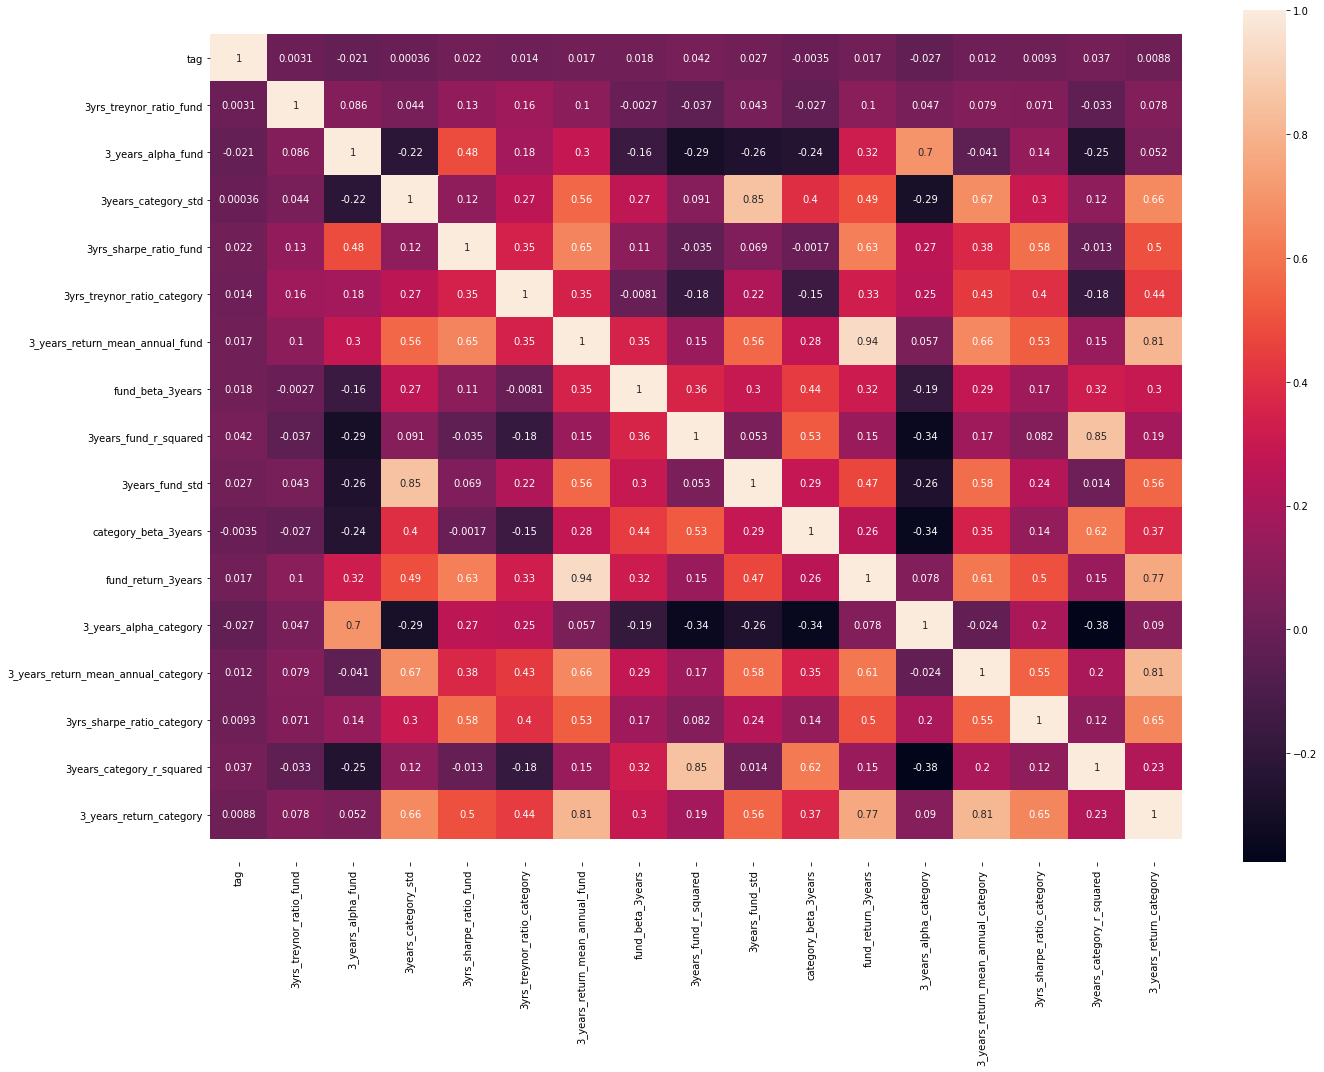

In [80]:
plt.figure(figsize=(20,15))
return_3year_corr=sns.heatmap(return_3year.corr(), annot=True)
b,t=return_3year_corr.get_ylim()
return_3year_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

In [82]:
return_5year=pd.read_csv('Datasets/return_5year.csv',thousands=',')
return_5year.head(10)

,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,tag,5_years_return_category
0,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,67922,-4.25
1,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,134783,11.26
2,0.86,1.15,2.96,89.02,10.28,0.01,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,61271,11.26
3,0.86,0.77,-0.50,82.36,8.53,0.01,0.69,9.30,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,64412,7.20
4,0.96,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,184058,5.95
5,0.79,0.49,-1.55,81.19,10.77,0.01,1.46,3.33,0.51,0.01,0.04,5.65,-0.00,0.01,0.09,249560,5.89
6,0.47,0.26,-0.30,23.66,3.42,0.00,0.25,3.32,0.14,0.00,0.02,1.64,-0.01,0.00,0.05,202778,1.36
7,0.86,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.07,0.00,-0.03,0.01,0.11,138257,7.20
8,0.89,0.34,0.41,88.73,13.24,0.00,0.92,3.96,0.38,0.00,-0.00,3.75,-0.02,0.01,0.12,102419,0.62
9,0.76,0.89,0.88,78.17,3.36,0.01,0.44,6.69,0.31,0.00,0.04,3.77,-0.00,0.00,0.04,62027,2.81


In [83]:
return_5year.fillna(return_5year.mean(),inplace=True)
return_5year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   category_r_squared_5years            25000 non-null  float64
 1   5yrs_sharpe_ratio_fund               25000 non-null  float64
 2   5_years_alpha_fund                   25000 non-null  float64
 3   5years_fund_r_squared                25000 non-null  float64
 4   5years_fund_std                      25000 non-null  float64
 5   5yrs_sharpe_ratio_category           25000 non-null  float64
 6   5_years_beta_fund                    25000 non-null  float64
 7   5yrs_treynor_ratio_fund              25000 non-null  float64
 8   5_years_return_mean_annual_fund      25000 non-null  float64
 9   5_years_return_mean_annual_category  25000 non-null  float64
 10  5yrs_treynor_ratio_category          25000 non-null  float64
 11  5_years_return_fund         

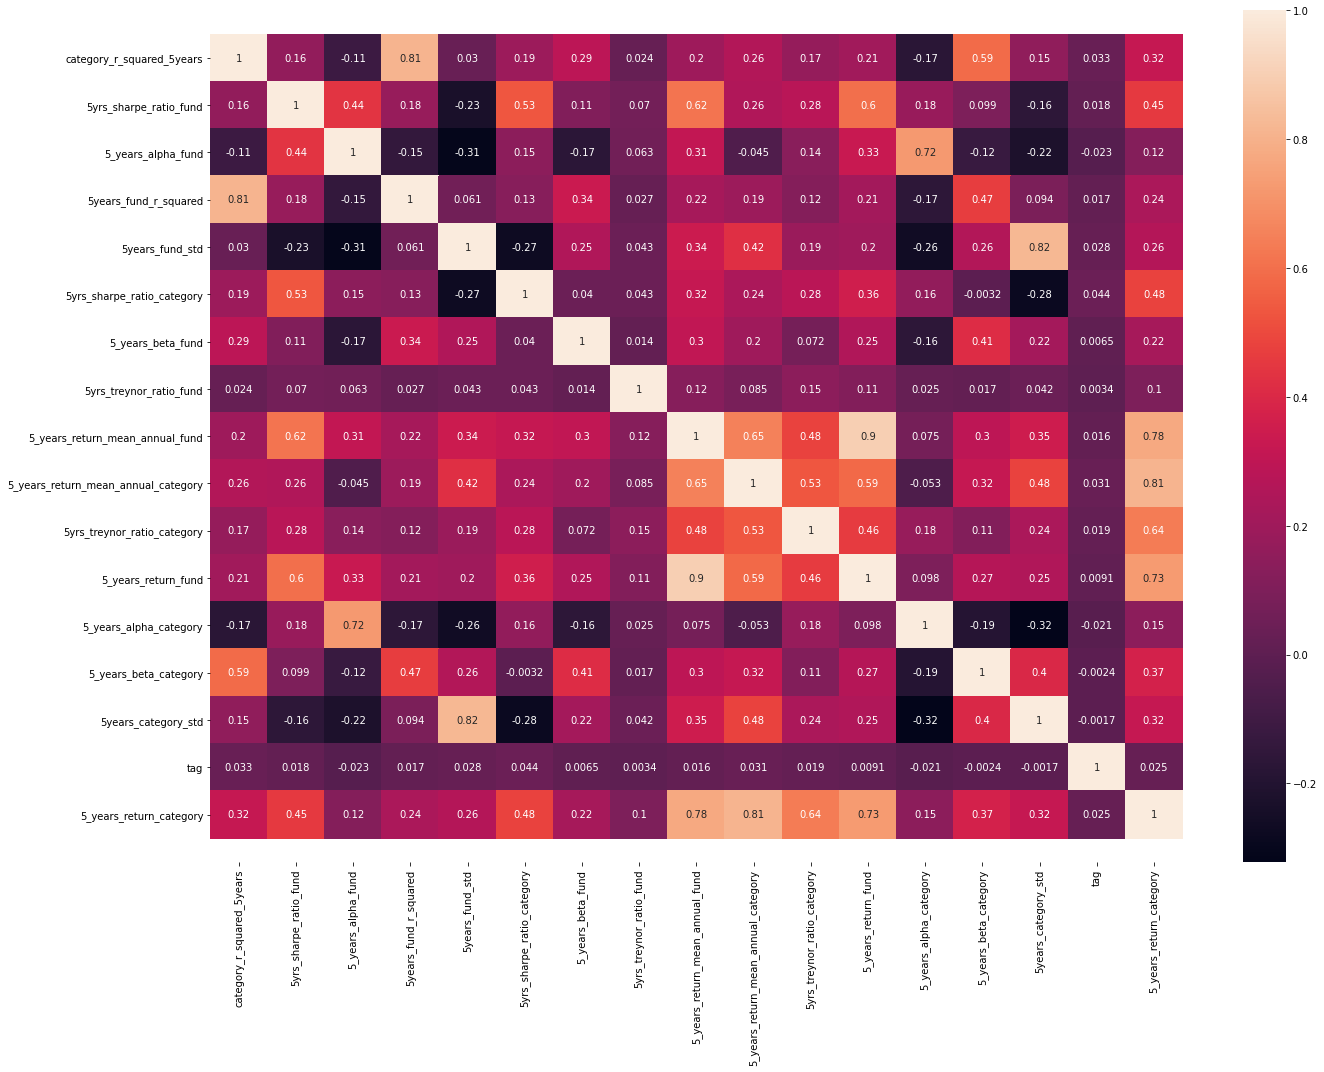

In [85]:
plt.figure(figsize=(20,15))
return_5year_corr=sns.heatmap(return_5year.corr(), annot=True)
b,t=return_5year_corr.get_ylim()
return_5year_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

In [86]:
return_10year=pd.read_csv('Datasets/return_10year.csv',thousands=',')

In [87]:
return_10year.head(10)

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,fund_id,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,f5ad58c2-fdea-4087-8678-e04744f89f90,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,0.88,1.22,1.00,90.69,12.68,0.01,0.95,16.58,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94
3,0.90,1.20,0.75,89.03,11.21,0.01,0.84,16.38,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68
4,0.97,NaN,NaN,NaN,NaN,0.01,NaN,NaN,63d8406d-c525-494a-8e03-d4fc4cfcb571,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,11.53
5,0.83,0.96,-0.65,84.19,10.84,0.01,1.22,8.44,090afb4d-eca3-4f69-8275-a140a0b40292,0.01,0.09,10.77,0.00,0.01,0.10,0.91,11.07
6,0.63,0.65,-0.88,53.84,5.39,0.01,0.49,7.08,17421c06-1ed9-4a00-b88b-91dcf9e0dc77,0.00,0.06,3.90,-0.01,0.01,0.07,0.33,4.77
7,0.90,NaN,NaN,NaN,NaN,0.01,NaN,NaN,08702e4f-c5bb-4f0a-b63b-f9e4a0eb2425,0.01,0.14,0.00,-0.02,0.01,0.13,NaN,13.68
8,0.93,0.08,-1.01,93.74,18.02,0.01,0.91,-0.23,40989717-745e-422c-a761-9695cb9989a8,0.01,0.08,0.58,-0.01,0.01,0.16,0.19,8.08
9,0.81,1.19,1.76,77.75,8.33,0.01,0.90,11.14,bcd0ba02-c92f-4d50-803c-1b9a9311ccfb,0.01,-0.14,10.53,0.01,0.00,0.05,0.87,6.24


In [88]:
return_10year.fillna(0,inplace=True)

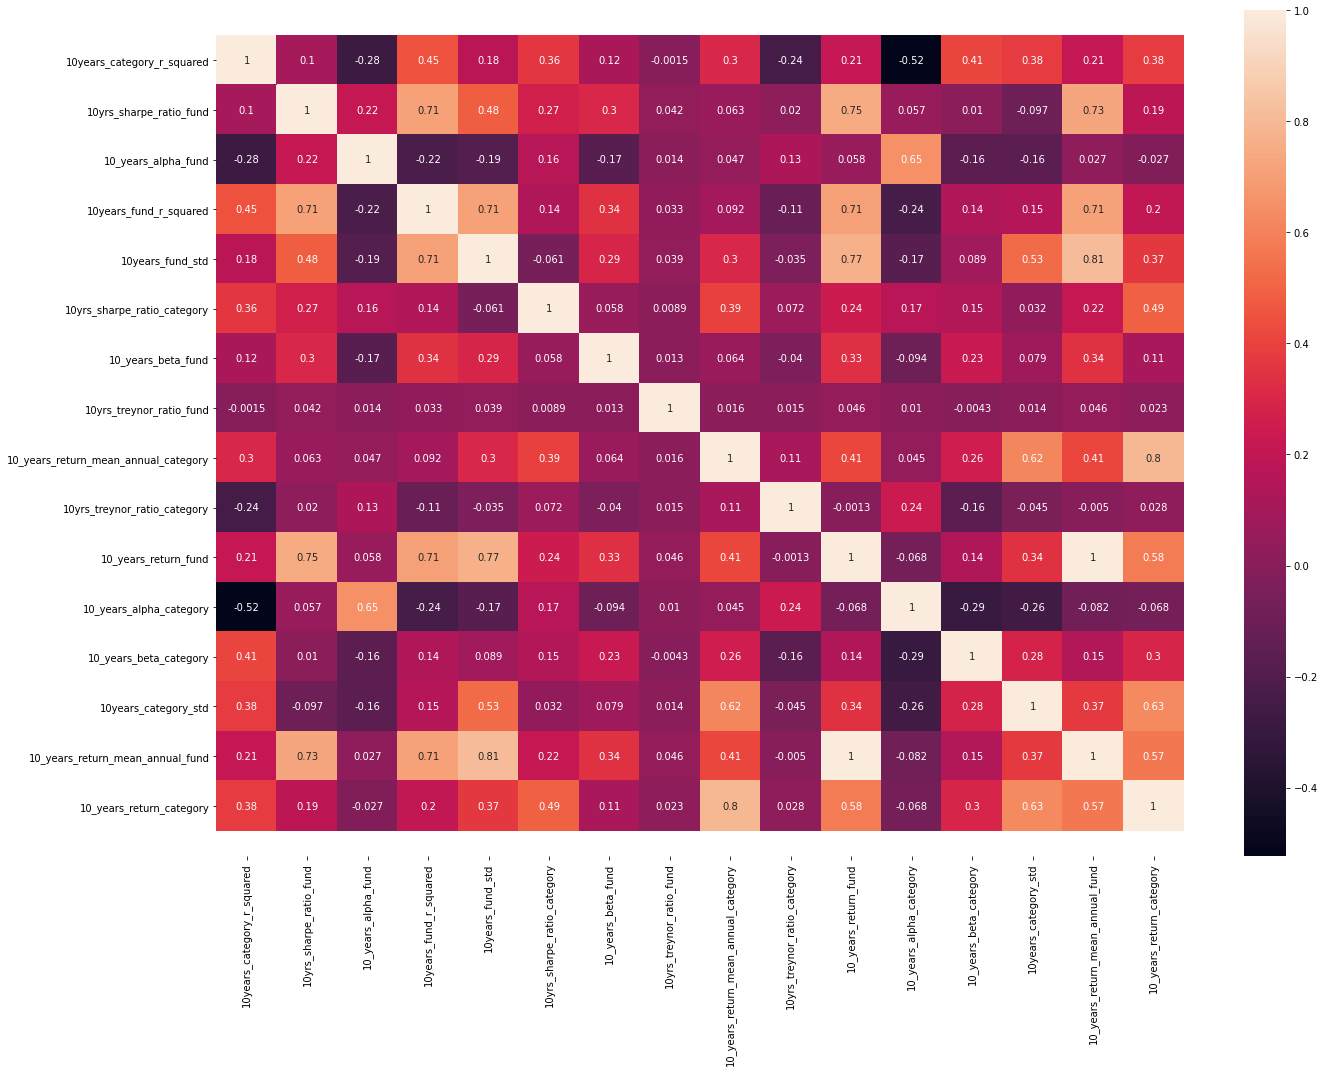

In [90]:
plt.figure(figsize=(20,15))
return_10year_corr=sns.heatmap(return_10year.corr(), annot=True)
b,t=return_10year_corr.get_ylim()
return_10year_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

In [94]:
# Now we will clean the data!
dataset=fund_specs.merge(fund_ratios)
dataset=dataset.merge(bond_ratings)
dataset=dataset.merge(fund_allocations)
dataset=dataset.merge(other_specs)
dataset=dataset.merge(return_3year)
dataset=dataset.merge(return_5year)
dataset=dataset.merge(return_10year)

In [95]:
# Test and train!
train_data=dataset[dataset.greatstone_rating.notna()]

In [96]:
train_target=train_data['greatstone_rating'].copy(deep=True)
train_data=train_data.drop(labels=['fund_id','tag','greatstone_rating'],axis=1)

In [100]:
rfc=RandomForestClassifier(n_estimators=500,random_state=11,criterion='entropy',class_weight='balanced')
rfc.fit(train_data,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [102]:
test_data=dataset[dataset.greatstone_rating.isna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 24999
Columns: 117 entries, investment_class to 10_years_return_category
dtypes: float64(112), int32(1), int64(3), object(1)
memory usage: 4.5+ MB


In [104]:
test_data

,investment_class,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd,fund_id,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,...,3years_fund_r_squared,3years_fund_std,category_beta_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,2,1.185000e+07,5.57,NaN,2015,67922,2,20.19,264614c6-5ac3-4146-ba26-1674b136cb40,1.44,1.71,1.31,19857.41,5.91,14.51,0.00,0.00,0.00,7.765444,0.00,0.00,0.00,0.00,0.00,4.643082,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,-16.32,13.05,1.19,...,54.83,16.25,0.01,-0.04,0.01,0.00,0.42,7.36,0.51,0.517838,-0.836764,72.452818,9.457442,-0.00,0.897861,4.238711,0.437478,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25,0.49,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.21,0.00,0.06,0.01,0.13,0.00,14.30
7,2,6.243000e+07,1.42,NaN,2015,138257,2,12.48,08702e4f-c5bb-4f0a-b63b-f9e4a0eb2425,1.04,2.18,1.17,38651.17,5.87,13.16,0.00,0.00,0.00,7.765444,0.00,0.00,0.00,0.00,0.00,4.643082,4.25,23.02,8.24,11.89,7.33,13.92,4.18,6.34,9.50,0.00,0.00,2.0,-8.53,4.48,3.32,...,84.16,12.21,0.01,-0.02,0.01,0.01,0.84,10.01,0.86,0.517838,-0.836764,72.452818,9.457442,0.01,0.897861,4.238711,0.437478,0.01,0.07,0.00,-0.03,0.01,0.11,7.20,0.90,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.14,0.00,-0.02,0.01,0.13,0.00,13.68
16,0,3.817200e+08,0.77,NaN,2005,191978,0,9.94,cf56db43-046b-49d0-b8f0-90fe9cf8aacf,0.85,2.28,1.34,3107.63,8.63,18.05,0.00,0.00,0.00,7.765444,0.00,0.00,0.00,0.00,0.00,4.643082,3.32,16.44,19.92,15.89,4.30,12.67,5.32,2.08,12.84,2.44,13.15,9.0,-5.76,7.70,2.47,...,74.84,14.27,0.01,-0.00,0.01,0.01,0.70,15.88,0.65,0.460000,-4.300000,68.300000,14.400000,0.01,1.060000,5.390000,0.620000,0.01,0.06,6.54,-0.03,0.01,0.17,8.45,0.73,0.97,-1.29,76.95,16.04,0.01,1.11,13.85,0.01,0.13,15.82,-0.02,0.01,0.18,1.34,16.24
24,1,6.910000e+06,1.95,NaN,2016,105506,2,11.77,3faa81fc-9640-43d0-8b68-e5b06c65bfe6,0.27,2.03,1.28,29145.49,6.96,13.37,5.33,0.00,0.04,20.430000,0.98,35.19,2.79,5.78,49.89,11.800000,3.07,15.17,9.91,17.55,11.15,11.94,6.95,3.74,12.88,0.00,0.00,1.0,-8.41,2.87,4.51,...,95.24,8.46,0.01,-0.01,0.01,0.01,0.95,9.94,0.95,0.740000,0.490000,94.160000,8.710000,0.01,1.270000,4.960000,0.600000,0.01,0.04,7.10,-0.01,0.01,0.10,6.41,0.95,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.08,0.00,-0.02,0.01,0.12,0.00,12.02
28,2,9.030900e+08,1.75,NaN,2012,58517,1,1.04,09e24f3d-7191-4207-887c-98f31c6b59d2,0.36,0.00,0.00,0.00,0.00,0.00,0.80,0.00,22.80,2.880000,0.90,27.00,7.20,22.10,19.20,1.560000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.44,0.00,6.0,1.18,2.46,6.89,...,70.56,0.99,0.00,-0.01,0.00,-0.00,0.70,1.11,0.66,0.340000,-0.370000,66.680000,0.850

In [105]:
test_fund_id=test_data.fund_id.copy()
test_data=test_data.drop(labels=['fund_id','tag','greatstone_rating'],axis=1)

In [106]:
output=rfc.predict(test_data)

In [107]:
output

array([2., 4., 2., ..., 3., 2., 2.])

In [108]:
result=pd.DataFrame()
result['fund_id']=test_fund_id
result['greatstone_rating']=output

In [109]:
result

,fund_id,greatstone_rating
0,264614c6-5ac3-4146-ba26-1674b136cb40,2.0
7,08702e4f-c5bb-4f0a-b63b-f9e4a0eb2425,4.0
16,cf56db43-046b-49d0-b8f0-90fe9cf8aacf,2.0
24,3faa81fc-9640-43d0-8b68-e5b06c65bfe6,3.0
28,09e24f3d-7191-4207-887c-98f31c6b59d2,3.0
...,...,...
24983,fc278788-24bf-4844-a538-d8c67d47275c,3.0
24992,0a3c101f-c969-4e85-8395-3dc3e33dd3d6,4.0
24996,12fc8949-6563-4dd4-a7cc-0400131fa6ab,3.0
24998,65421547-1407-4c50-92dc-e1cb1e9972dd,2.0


In [110]:
result.greatstone_rating.value_counts()

3.0    1860
4.0    1171
2.0    1013
0.0     339
5.0     338
1.0     279
Name: greatstone_rating, dtype: int64

In [111]:
result.to_csv("result.csv",index=False)